In [1]:
#%load_ext autoreload
#%autoreload 2

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_poissonVI_embedding.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

# LSI ATAC space

In [5]:
tp0 = TemporalProblem(adata)
tp0 = tp0.prepare("time", joint_attr="lsi_red")

In [6]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean", max_iterations=1e5)

In [7]:
tp0[14.5, 15.5].solution.converged

True

In [8]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=True)

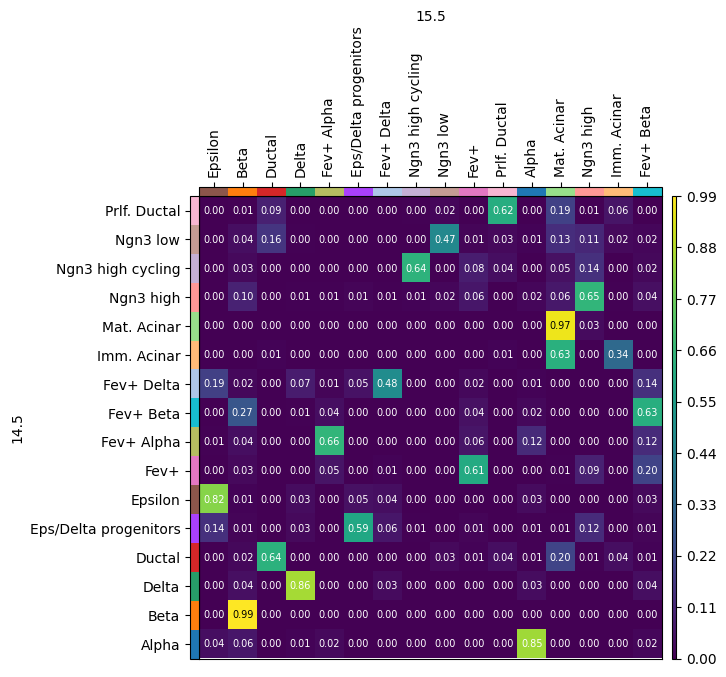

In [9]:
import moscot.plotting as mpl
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [10]:
ct_anc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

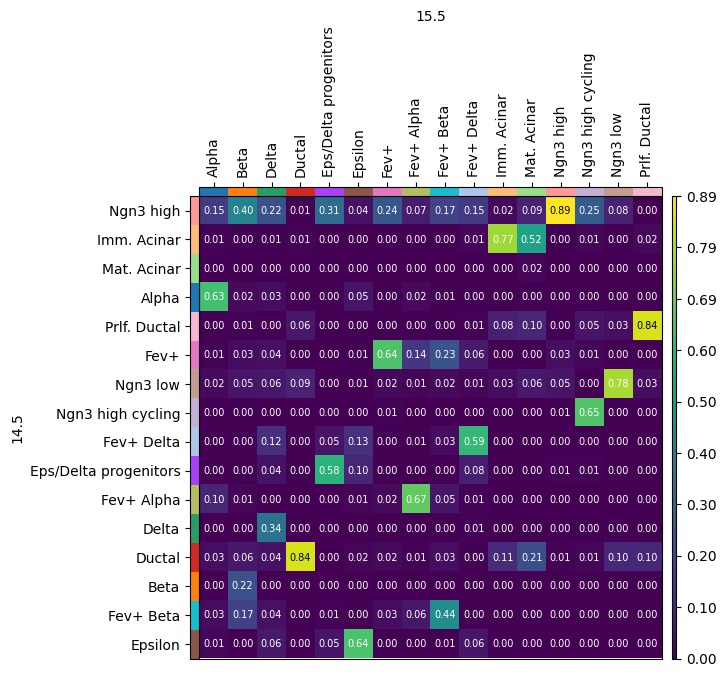

In [11]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

# poissVI on ATAC space

In [12]:
tp1 = TemporalProblem(adata)
tp1 = tp1.prepare("time", joint_attr="X_poiss_vi")

In [13]:
tp1 = tp1.solve(epsilon=1e-2, scale_cost="mean")

In [18]:
ct_desc = tp1.cell_transition(early_annotation="celltype", late_annotation="celltype", start=14.5, end=15.5, forward=True)

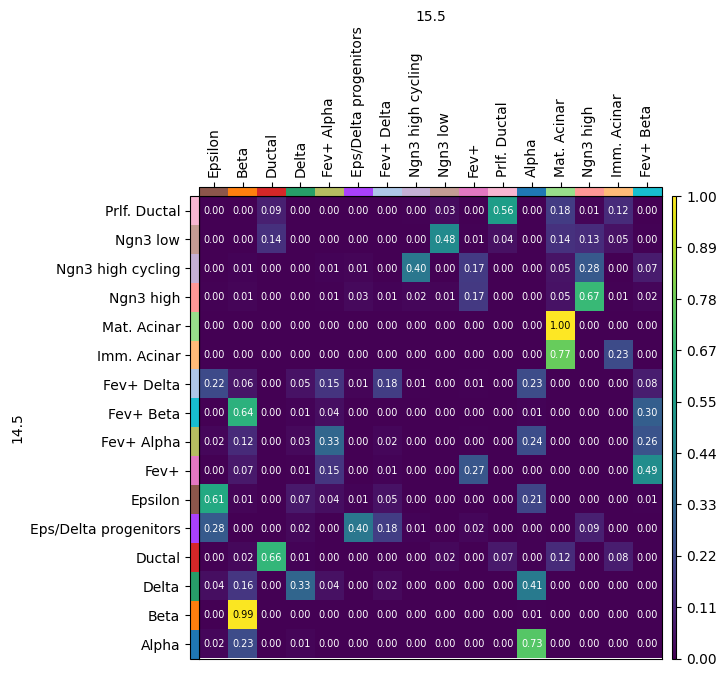

In [19]:
mpl.cell_transition(tp1, dpi=100, fontsize=7)

In [16]:
ct_anc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype", late_annotation="celltype", forward=False)

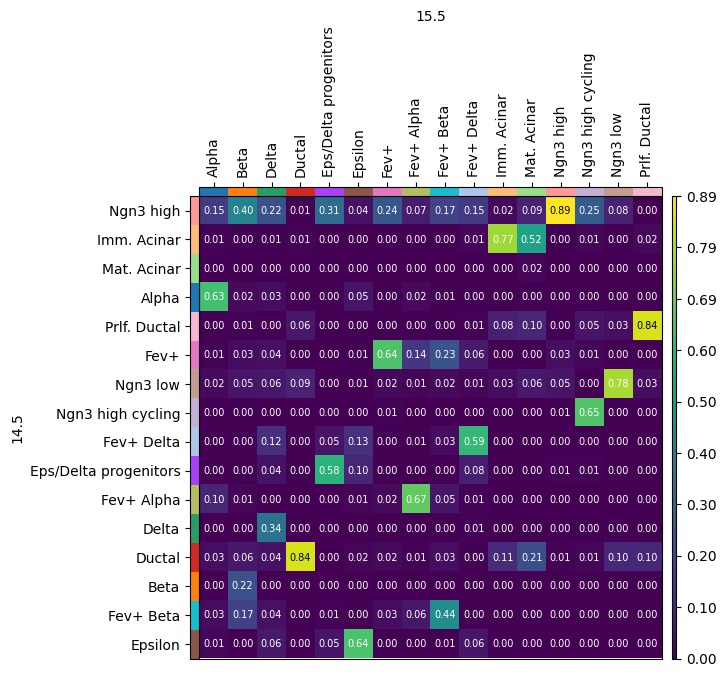

In [17]:
mpl.cell_transition(tp1, dpi=100, fontsize=7)